## Titanic survivor prediction using logistic regression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory data analysis

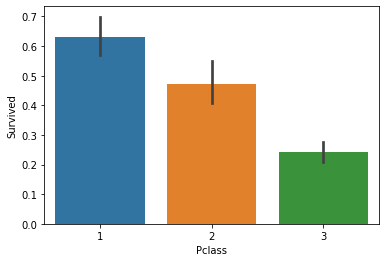

In [6]:
sns.barplot(x = data_set['Pclass'],y = data_set['Survived'])

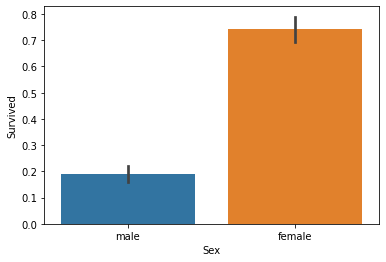

In [7]:
sns.barplot(x = 'Sex', y = 'Survived',data = data_set)

##### so the first class people and females have a high survival rate.

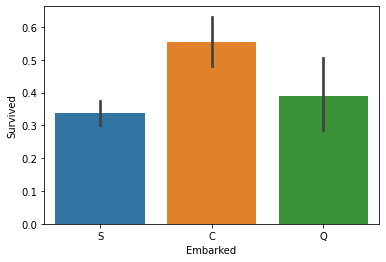

In [8]:
sns.barplot(x = 'Embarked', y = 'Survived', data = data_set)


* ###### we can infer from the above barplot that people embarked at c has higher rate of survival

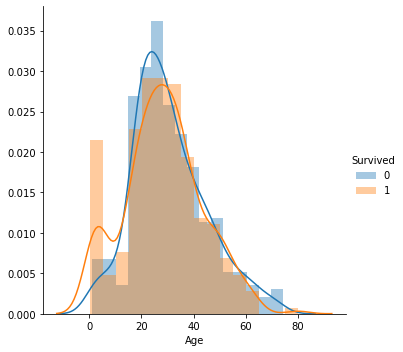

In [9]:
sns.FacetGrid(data= data_set, hue="Survived", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend()

###### the avg age of survival is around 30?


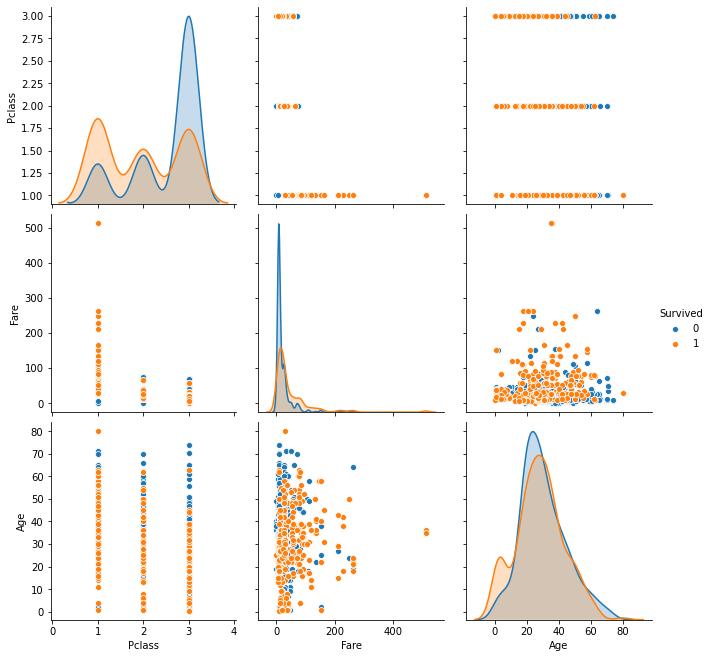

In [10]:
sns.pairplot(data_set[["Survived","Pclass","Fare","Age"]], hue="Survived", height=3)

## filling missing data 

In [11]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)

In [13]:
age = data_set.iloc[:,5:6].values

In [14]:
data_set['Age'] =imputer.fit_transform(age)

In [15]:
data_set['Age'].isnull().sum()

0

In [16]:
data_set['Embarked'].value_counts().idxmax()

'S'

In [17]:
data_set['Embarked'] = data_set['Embarked'].fillna('mode')

In [18]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##  dropping unrelated columns

In [19]:
data_set = data_set.drop(['SibSp','Parch','Ticket','Name','Cabin'],axis = 1)

In [20]:
data_set

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
888,889,0,3,female,28.0,23.4500,S
889,890,1,1,male,26.0,30.0000,C


## correlation check

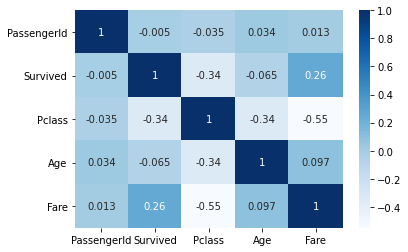

In [21]:
sns.heatmap(data_set.corr(),annot = True, cmap = 'Blues')

## handling categorical data

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
data_set['Embarked'] = encoder.fit_transform(data_set['Embarked'])

In [24]:
data_set['Sex'] = data_set['Sex'].replace(to_replace = ['male','female'], value = [0,1])
data_set

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,0,22.0,7.2500,2
1,2,1,1,1,38.0,71.2833,0
2,3,1,3,1,26.0,7.9250,2
3,4,1,1,1,35.0,53.1000,2
4,5,0,3,0,35.0,8.0500,2
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,2
887,888,1,1,1,19.0,30.0000,2
888,889,0,3,1,28.0,23.4500,2
889,890,1,1,0,26.0,30.0000,0


## Model_selection -- logistic regression

In [25]:
x = data_set.iloc[:,[0,2,3,4,5,6]].values
y = data_set.iloc[:,1].values


In [26]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()

In [27]:
reg_model.fit(x,y)

LogisticRegression()

## test_set preprocessing

In [28]:
test_set = pd.read_csv('/kaggle/input/titanic/test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test_set = test_set.drop(['Name','SibSp','Parch','Cabin','Ticket'],axis = 1)
test_set

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,male,34.5,7.8292,Q
1,893,3,female,47.0,7.0000,S
2,894,2,male,62.0,9.6875,Q
3,895,3,male,27.0,8.6625,S
4,896,3,female,22.0,12.2875,S
...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S
414,1306,1,female,39.0,108.9000,C
415,1307,3,male,38.5,7.2500,S
416,1308,3,male,NaN,8.0500,S


In [30]:
test_set.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
dtype: int64

In [31]:
test_set['Embarked'] = encoder.transform(test_set['Embarked'])
test_set['Sex'] = test_set['Sex'].replace(to_replace = ['male','female'], value = [0,1])

In [32]:
t_age = test_set.iloc[:,3:4].values
test_set['Age'] = imputer.transform(t_age)

In [33]:
test_set

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,0,34.5,7.8292,1
1,893,3,1,47.0,7.0000,2
2,894,2,0,62.0,9.6875,1
3,895,3,0,27.0,8.6625,2
4,896,3,1,22.0,12.2875,2
...,...,...,...,...,...,...
413,1305,3,0,28.0,8.0500,2
414,1306,1,1,39.0,108.9000,0
415,1307,3,0,38.5,7.2500,2
416,1308,3,0,28.0,8.0500,2


In [34]:
test_set['Fare'].mean()

35.6271884892086

In [35]:
test_set['Fare'] = test_set['Fare'].replace(to_replace = np.nan,value = 35.6200)

In [36]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

In [37]:
x_test = test_set.iloc[:,:].values 
x_test

array([[8.92000e+02, 3.00000e+00, 0.00000e+00, 3.45000e+01, 7.82920e+00,
        1.00000e+00],
       [8.93000e+02, 3.00000e+00, 1.00000e+00, 4.70000e+01, 7.00000e+00,
        2.00000e+00],
       [8.94000e+02, 2.00000e+00, 0.00000e+00, 6.20000e+01, 9.68750e+00,
        1.00000e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 0.00000e+00, 3.85000e+01, 7.25000e+00,
        2.00000e+00],
       [1.30800e+03, 3.00000e+00, 0.00000e+00, 2.80000e+01, 8.05000e+00,
        2.00000e+00],
       [1.30900e+03, 3.00000e+00, 0.00000e+00, 2.80000e+01, 2.23583e+01,
        0.00000e+00]])

In [38]:
y_pred = reg_model.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
submit = pd.DataFrame(test_set['PassengerId'])

## submission formatting

In [41]:
submit['Survived'] = y_pred
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
